# Data Cleaning Studio

You are part of a team working for an agricultural nonprofit based in California. Your nonprofit focuses on helping farmers in the state grow profitable crops in environmentally-friendly ways in an effort to reduce the impact of climate change on the state and provide enough food for the state's 39.5 million residents. With Halloween on the horizon, you and your team are looking to analyze past pumpkin crops to try and answer several questions:
1. Are pumpkins sold at terminal markets in California (San Francisco and Los Angeles) grown in California?
1. Is the harvest season for pumpkins grown in California consistent year-to-year?
1. Are pumpkin farmers growing specific varieties of pumpkins for specific reasons?

The answers to these questions will help your nonprofit decide if they should promote specific varieties or growing practices to the farmers they serve in time for seeds to be planted next year. Your team has already performed some exploratory analysis on the San Francisco terminal market report of pumpkin sales from 9/2016-9/2017. Now it is time to clean the data!

Before diving in to cleaning the data, here is a quick guide to the different columns in the USDA report and what they mean:
- Commodity Name: This CSV structure is used for lots of USDA reports. In this case, the commodity is pumpkins
- City Name: City where the pumpkin was sold. The city is a terminal market location within the United States.
- Type: This refers to the type of farming used in growing the pumpkins
- Package: The way the pumpkins were packed for sale
- Variety: Specific type of pumpkin, i.e. pie pumpkin or a Howden pumpkin
- Sub Variety: Addition classifications about the pumpkins, i.e. is it a flat pumpkin?
- Grade: In the US, usually only canned pumpkin is graded
- Date: Date of sale (rounded up to the nearest Saturday)
- Low Price: This price is in reference to sale price
- High Price: This price is in reference to sale price
- Mostly Low: This column is not measured for pumpkins
- Mostly High: This column is not measured for pumpkins
- Origin: Which state the pumpkins were grown in
- Origin District: Additional information about pumpkins' origin location
- Item Size: Abbreviations denoting size, i.e. jbo = jumbo, lrg = large
- Color: Color of pumpkins
- Environment: Additional information about pumpkins' growing environment
- Unit of Sale: The unit the customer bought at market, i.e. if they bought pumpkins by the pound, the data should say "PER LB" or  if they bought pumpkins by the bin, it would say "PER BIN"
- Quality: Additional notes about pumpkin quality as necessary
- Condition: Additional notes about pumpkin condition as necessary
- Appearance: Additional notes about pumpkin appearance as necessary
- Storage: Additional notes about pumpkin storage as necessary
- Crop: Additional notes about pumpkin crop as necessary
- Repack: Whether the pumpkin has been repackaged before sale
- Trans Mode: Mode of transportation used to get pumpkins to terminal market

In [2]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("san-fransisco_9-24-2016_9-30-2017.csv")

In [7]:
data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,135.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,135.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [108]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Type - 78%
Package - 0%
Variety - 0%
Sub Variety - 61%
Grade - 100%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Origin District - 100%
Item Size - 75%
Color - 72%
Environment - 100%
Unit of Sale - 100%
Quality - 100%
Condition - 100%
Appearance - 100%
Storage - 100%
Crop - 100%
Repack - 0%
Trans Mode - 100%


In [5]:
# Checking the overall percentage of missing data from the data set

total_cells = np.prod(data.shape)

missing_cells = pd.isnull(data).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")    

51.0 % Missing cells from the data


### Question 1: 

Look at the percentages of missing data per coluum.  There are quite a few columns with less than 100% of the data.  What do you want to do with each column?   Consider the following options for each and write down your thoughts in a box below this one.
1. Drop the Observation
1. Drop the Feature
1. Impute the Missing Values
1. Replace the Missing Values

In [110]:
# Answer Question 1 here:
For columns that include additional information, and are missing a large or 100% of data, I would drop these columns. 
I would drop the "Mostly Low" and "Mostly High" columns which do not contain data pertinent to our research questions.
I would also drop the Sub Variety column, which is missing a large percentage of data. The Variety columns contains important information, and is not missing any data, so we want to keep it. 


In [8]:
data['Color'].value_counts()
# Quick way to get counts of each unique value

Color
ORANGE     21
WHITE      18
STRIPED     7
Name: count, dtype: int64

In [23]:
# Repack Column
data["Repack"] = data["Repack"].replace({"N":False})
#Check status with a quick head check
data.head(3)

/var/folders/rw/z7w4hy9s6l3bz7kns43sc2j00000gn/T/ipykernel_56053/3670576720.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Repack"] = data["Repack"].replace({"N":False})


,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,...,Origin District,Item Size,Color,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack
0,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,155.0,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,...,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [24]:
#Check status with a quick head check
data.head(3)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,...,Origin District,Item Size,Color,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack
0,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,155.0,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,...,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# Question 2:

Look at the "Type" column.  This column contains two values, "Organic" and "NaN".  
When it comes to food, food is either typically designated as "Organic" or "Conventional" based on farming practices.  

Do you think we should update the "NaN" values to "Conventional"?  Why or Why not?

In [11]:
# Answers Question 2:
# Yes, I think so. We are trying to find environmentally friendly ways of farming pumpkins, and having information 


SyntaxError: invalid syntax (1653832189.py, line 2)

In [12]:
# Fill the Missing Values in the Type Column
data["Type"] = data["Type"].fillna("Conventional")

data['Type'].value_counts()

Type
Conventional    130
Organic          36
Name: count, dtype: int64

# Question 3

Based on the information provided by our team, "Grade" is only applied to canned pumpkin.  
These were all uncanned, whole pumpkins.  This column is irrelevant to the dataset.

We are going to drop the column.  Do you agree with this choice?  Why or why not?

In [114]:
# Answer Question 3 here:
Yes, since we are only concerned with farming/the environment when it comes to this dataset, we do not need info about canned pumpkins.

In [13]:
# Grade Column 
data = data.drop(["Grade"], axis=1) 

In [14]:
#Check with shape
data.shape

(166, 24)

# Question 4

Decide which columns are relevant and irrelevant as a group.

Do you think any of the columns empty for a reason?  What reason do you think? 
Is this intentional or unintentional?  
What do you think?

In [117]:
# Explain your rationale breifly here: 
The "Grade" column is most likely empty for a reason, since it's about canned pumpkins. Transportation mode is also empty. We can maybe assume that it is because it is irrelevant to our research questions.


In [25]:
# Drop the ones you decide are irrelevant using the code we used to drop the "Grade Column"
data = data.drop(columns=['Environment'])

KeyError: "['Environment'] not found in axis"

In [26]:
data.head(3)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,...,Origin District,Item Size,Color,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack
0,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,155.0,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,PUMPKINS,SAN FRANCISCO,Conventional,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,155.0,155.0,155.0,...,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# Question 5:

Plot the outliers for them.
histogram of date vs. sales


What do you think about the dates?  

In [119]:
# Answer 5 here:
The dates are in order of sales, rather than in date order. This does not show a trend of sales over time; rather, it shows which date saw the highest sales versus the lowest


<AxesSubplot:>

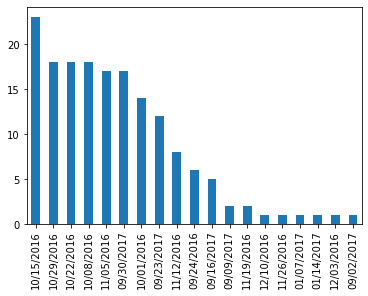

In [120]:
# # bar chart -  distribution of a categorical variable
data['Date'].value_counts().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '09/24/2016'),
  Text(1, 0, '10/01/2016'),
  Text(2, 0, '10/08/2016'),
  Text(3, 0, '10/15/2016'),
  Text(4, 0, '10/22/2016'),
  Text(5, 0, '10/29/2016'),
  Text(6, 0, '11/05/2016'),
  Text(7, 0, '09/16/2017'),
  Text(8, 0, '09/23/2017'),
  Text(9, 0, '09/30/2017'),
  Text(10, 0, '09/09/2017'),
  Text(11, 0, '08/19/2017'),
  Text(12, 0, '08/26/2017'),
  Text(13, 0, '09/02/2017')])

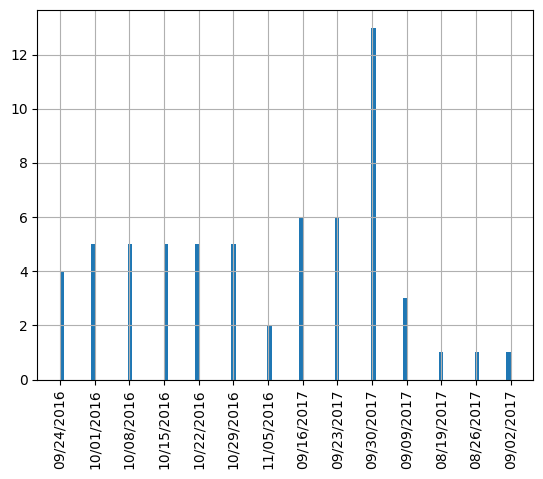

In [55]:
# # histogram of dates.
data['Date'].hist(bins=100)
plt.xticks(rotation=90)

#ignore the lists above the histogram for right now.  Examine the histogram.

# Question 6:

Are there any points in this data set that you worry about inconsistencies? 
Where?  What would you want to check?  Why?

In [122]:
# Answer Question 6 here: 
There could be inconsistencies with string values, such as spelling errors, discrepancies between what is capitalized versus lower-case. Data could be input inconsistently.


# Bonus Mission

Fix the LA page at this link: [A Year of Pumpkin Prices](https://www.kaggle.com/usda/a-year-of-pumpkin-prices)

In [37]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'los-angeles_9-24-2016_9-30-2017.csv')

In [38]:
data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [39]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Type - 100%
Package - 0%
Variety - 0%
Sub Variety - 90%
Grade - 100%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Origin District - 50%
Item Size - 26%
Color - 84%
Environment - 100%
Unit of Sale - 15%
Quality - 100%
Condition - 100%
Appearance - 100%
Storage - 100%
Crop - 100%
Repack - 0%
Trans Mode - 100%


In [40]:
total_cells = np.prod(data.shape)

missing_cells = pd.isnull(data).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")

47.0 % Missing cells from the data


In [41]:
data.head(3)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [42]:
data = data.drop(["Grade"], axis=1) 

In [44]:
data = data.drop(["Sub Variety"], axis=1)

In [46]:
data = data.drop(["Environment"], axis=1)

In [47]:
data.head(5)

,Commodity Name,City Name,Type,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,...,Item Size,Color,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,...,lge,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,...,med,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,...,lge,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,...,med,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/08/2016,120.0,130.0,120.0,130.0,...,lge,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [48]:
data = data.drop(["Quality"], axis=1)
data = data.drop(["Condition"], axis=1)
data = data.drop(["Appearance"], axis=1)
data = data.drop(["Storage"], axis=1)
data = data.drop(["Crop"], axis=1)

In [49]:
data.head(5)

,Commodity Name,City Name,Type,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/08/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,NaN


In [50]:
data["Repack"] = data["Repack"].replace({"N":False})

/var/folders/rw/z7w4hy9s6l3bz7kns43sc2j00000gn/T/ipykernel_56053/3726148213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Repack"] = data["Repack"].replace({"N":False})


In [51]:
data.head(5)

,Commodity Name,City Name,Type,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,False,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,False,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,False,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,False,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,10/08/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,False,NaN
